## Adult dataset 

Questo è un buon esempio di quello che vorrei ottenere, ma non è molto utile come risultato.

In [32]:
%run -i 'functions.py'
%run -i 'encode_csv.py'

In [33]:
adult_train = pd.read_csv(
    "../datasets/adult.data.txt",
    names=[
        "Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"],
        sep=r'\s*,\s*',
        engine='python',
        na_values="?")

print(len(adult_train))
adult_train = adult_train.dropna()
print(len(adult_train))

adult_train.head()

32561
30162


,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [16]:
adult_test = pd.read_csv(
    "../datasets/adult.test.txt",
    names=[
        "Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"],
        sep=r'\s*,\s*',
        engine='python',
        na_values="?")

print(len(adult_test))
adult_test = adult_test.dropna()
print(len(adult_test))

adult_test.head()

16282
15060


,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
6,34,Private,198693.0,10th,6.0,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,<=50K.


In [34]:
adult_train_encoded, encoders = number_encode_features(adult_train)
adult_train_encoded.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0


In [17]:
adult_test_encoded, encoders = number_encode_features(adult_test)
adult_test_encoded.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
1,8,2,226802.0,1,7.0,4,6,3,2,1,0.0,0.0,40.0,37,0
2,21,2,89814.0,11,9.0,2,4,0,4,1,0.0,0.0,50.0,37,0
3,11,1,336951.0,7,12.0,2,10,0,4,1,0.0,0.0,40.0,37,1
4,27,2,160323.0,15,10.0,2,6,0,2,1,7688.0,0.0,40.0,37,1
6,17,2,198693.0,0,6.0,4,7,1,4,1,0.0,0.0,30.0,37,0


In [35]:
y_train = adult_train_encoded["Target"].values
# y_train = y_train.values

# scale between -1 and 1
X_train = adult_train_encoded.iloc[:,:-1]
X_train = scale_columns(X_train)

X_train.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
0,0.007700,0.466779,-0.076331,-0.088918,0.191913,0.236644,-0.458450,-0.083668,0.080349,0.324315,0.01082,-0.020288,-0.009502,0.040436
1,0.158385,0.300113,-0.072391,-0.088918,0.191913,-0.096689,-0.227681,-0.283668,0.080349,0.324315,-0.01092,-0.020288,-0.285013,0.040436
2,-0.005999,-0.033221,0.017575,0.044416,-0.074754,-0.430022,-0.073835,-0.083668,0.080349,0.324315,-0.01092,-0.020288,-0.009502,0.040436
3,0.199481,-0.033221,0.030543,-0.622251,-0.208087,-0.096689,-0.073835,-0.283668,-0.419651,0.324315,-0.01092,-0.020288,-0.009502,0.040436
4,-0.142985,-0.033221,0.101034,-0.088918,0.191913,-0.096689,0.233858,0.716332,-0.419651,-0.675685,-0.01092,-0.020288,-0.009502,-0.809564


In [18]:
y_test = adult_test_encoded["Target"].values

# scale between -1 and 1
X_test = adult_test_encoded.iloc[:,:-1]
X_test = scale_columns(X_test)

X_test.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
1,-0.191213,-0.035812,0.025178,-0.618158,-0.207517,0.234119,0.000843,0.319721,-0.420916,0.326228,-0.011203,-0.023619,-0.009710,0.039292
2,-0.010657,-0.035812,-0.067575,0.048508,-0.074183,-0.099214,-0.153003,-0.280279,0.079084,0.326228,-0.011203,-0.023619,0.092331,0.039292
3,-0.149546,-0.202479,0.099759,-0.218158,0.125817,-0.099214,0.308535,-0.280279,0.079084,0.326228,-0.011203,-0.023619,-0.009710,0.039292
4,0.072676,-0.035812,-0.019834,0.315175,-0.007517,-0.099214,0.000843,-0.280279,-0.420916,0.326228,0.065678,-0.023619,-0.009710,0.039292
6,-0.066213,-0.035812,0.006146,-0.684825,-0.274183,0.234119,0.077766,-0.080279,0.079084,0.326228,-0.011203,-0.023619,-0.111751,0.039292


In [7]:
import pickle
X_train.to_pickle('adult_train_clean.pickle')

In [19]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=13)
print(len(X_train), "training,", len(X_test), "test")

30162 training, 15060 test


In [56]:
adult_fit = fit_all(X_train, y_train, X_test, y_test, scale_samples=10)
save(adult_fit, 'adult')


kernel svm fitting

linear svm fitting

nystroem svm fitting

 10 / 80 samples

 20 / 80 samples

 30 / 80 samples

 40 / 80 samples

 50 / 80 samples

 60 / 80 samples

 70 / 80 samples

 80 / 80 samples

fourier svm fitting

 10 / 80 samples

 20 / 80 samples

 30 / 80 samples

 40 / 80 samples

 50 / 80 samples

 60 / 80 samples

 70 / 80 samples

 80 / 80 samples


In [ ]:
# adult_fit

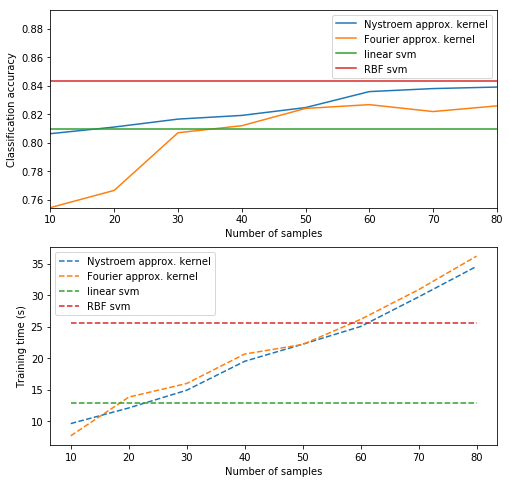

In [59]:
plot_results(adult_fit)

In [14]:
job_results

{'fourier': {'scores': [0.8737373737373737,
   0.9494949494949495,
   0.9797979797979798,
   0.9848484848484849,
   0.98989898989899,
   0.9848484848484849,
   0.9696969696969697,
   0.9747474747474747,
   0.98989898989899,
   0.98989898989899],
  'times': [0.06317567825317383,
   0.07107806205749512,
   0.08359622955322266,
   0.19371414184570312,
   0.21912240982055664,
   0.2534658908843994,
   0.25353360176086426,
   0.2769045829772949,
   0.30194592475891113,
   0.3050210475921631]},
 'kernel': {'score': 0.98989898989899, 'time': 0.3844027519226074},
 'linear': {'score': 0.98989898989899, 'time': 0.3048717975616455},
 'nystroem': {'scores': [0.9494949494949495,
   0.9848484848484849,
   0.98989898989899,
   0.98989898989899,
   0.98989898989899,
   0.98989898989899,
   0.98989898989899,
   0.98989898989899,
   0.98989898989899,
   0.98989898989899],
  'times': [0.09385013580322266,
   0.19352984428405762,
   0.21885967254638672,
   0.2697606086730957,
   0.24379992485046387,
   0.

In [3]:
job_results = pickle.load(open('pickle/adult.pickle','rb'))

In [6]:
job_results

{'kernel': {'score': 0.98989898989899, 'time': 0.3844027519226074},
 'linear': {'score': 0.98989898989899, 'time': 0.3048717975616455},
 'nystroem': {'scores': [0.9494949494949495,
   0.9848484848484849,
   0.98989898989899,
   0.98989898989899,
   0.98989898989899,
   0.98989898989899,
   0.98989898989899,
   0.98989898989899,
   0.98989898989899,
   0.98989898989899],
  'times': [0.09385013580322266,
   0.19352984428405762,
   0.21885967254638672,
   0.2697606086730957,
   0.24379992485046387,
   0.2520463466644287,
   0.2766079902648926,
   0.2576408386230469,
   0.28482961654663086,
   0.316648006439209]},
 'fourier': {'scores': [0.8737373737373737,
   0.9494949494949495,
   0.9797979797979798,
   0.9848484848484849,
   0.98989898989899,
   0.9848484848484849,
   0.9696969696969697,
   0.9747474747474747,
   0.98989898989899,
   0.98989898989899],
  'times': [0.06317567825317383,
   0.07107806205749512,
   0.08359622955322266,
   0.19371414184570312,
   0.21912240982055664,
   0.25

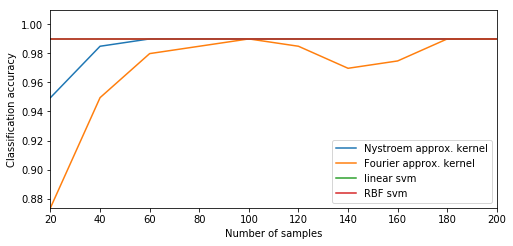

In [5]:
plot_accuracy(job_results)

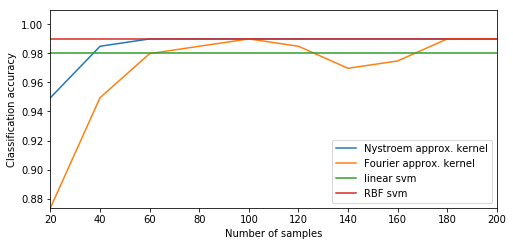

In [9]:
fit = job_results

sample_sizes = fit['sample_sizes']

kernel = fit['kernel']
linear = fit['linear']
nystroem = fit['nystroem']
fourier = fit['fourier']

kernel_svm_score = kernel['score']
linear_svm_score = linear['score']
nystroem_scores = nystroem['scores']
fourier_scores = fourier['scores']

kernel_svm_time = kernel['time']
linear_svm_time = linear['time']
nystroem_times = nystroem['times']
fourier_times = fourier['times']

# plot the results
plt.figure(figsize=(8, 8))

accuracy = plt.subplot(211)

accuracy.plot(sample_sizes, nystroem_scores, label="Nystroem approx. kernel")
accuracy.plot(sample_sizes, fourier_scores, label="Fourier approx. kernel")
# horizontal lines for exact rbf and linear kernels:
accuracy.plot([sample_sizes[0], sample_sizes[-1]],
              [linear_svm_score-0.01, linear_svm_score-0.01], label="linear svm")
accuracy.plot([sample_sizes[0], sample_sizes[-1]],
              [kernel_svm_score, kernel_svm_score], label="RBF svm")



# vertical line for dataset dimensionality = 64
# accuracy.plot([64, 64], [0.7, 1], label="n_features")

# legends and labels
# accuracy.set_title("Classification accuracy")
# timescale.set_title("Training times")
accuracy.set_xlim(sample_sizes[0], sample_sizes[-1])

# accuracy.set_xticks(())
accuracy.set_ylim(np.min(fourier_scores), kernel_svm_score*1.02)
accuracy.set_xlabel("Number of samples")
accuracy.set_ylabel("Classification accuracy")
accuracy.legend(loc='best')



plt.show()

In [2]:
%run -i 'functions.py'

Using TensorFlow backend.


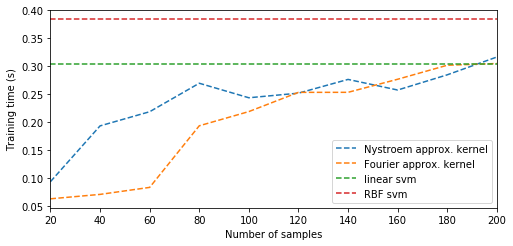

In [4]:
plot_timescale(job_results)

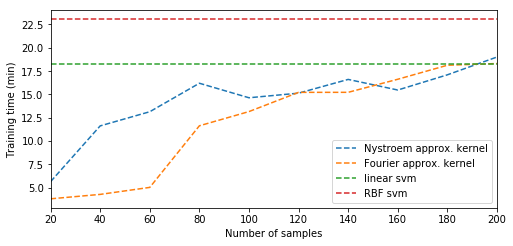

In [30]:
fit = job_results

sample_sizes = fit['sample_sizes']

kernel = fit['kernel']
linear = fit['linear']
nystroem = fit['nystroem']
fourier = fit['fourier']

kernel_svm_score = kernel['score']
linear_svm_score = linear['score']
nystroem_scores = nystroem['scores']
fourier_scores = fourier['scores']

kernel_svm_time = kernel['time']*60
linear_svm_time = linear['time']*60
nystroem_times = [time*60 for time in nystroem['times']]
fourier_times = [time*60 for time in fourier['times']]

# plot the results
plt.figure(figsize=(8, 8))

timescale = plt.subplot(212)

timescale.plot(sample_sizes, nystroem_times, '--', label='Nystroem approx. kernel')
timescale.plot(sample_sizes, fourier_times, '--', label='Fourier approx. kernel')
timescale.plot([sample_sizes[0], sample_sizes[-1]],
               [linear_svm_time, linear_svm_time], '--', label='linear svm')
timescale.plot([sample_sizes[0], sample_sizes[-1]],
               [kernel_svm_time, kernel_svm_time], '--', label='RBF svm')
timescale.set_xlim(sample_sizes[0], sample_sizes[-1])
timescale.set_xlabel("Number of samples")
timescale.set_ylabel("Training time (min)")
timescale.legend(loc='best')

### Conclusioni

Qui ho 30162 training e 15060 test. Con meno di 60 random samples ho un'accuratezza abbastanza buona e tempi di esecuzione più bassi rispetto a RBF, ma comunque si tratta di pochi secondi... niente di utile quindi.

Devo ritestarlo con GPU.

## Proiezioni approssimate sul piano 


<Figure size 432x288 with 0 Axes>

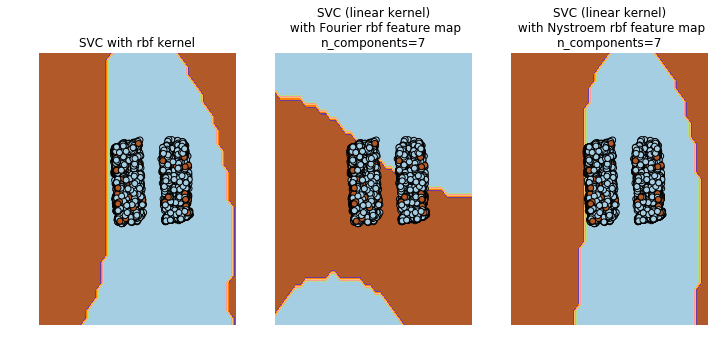

In [21]:
%run -i 'pca_projections.py'
pca_projections(X_train, y_train)

## Plotly PCA

In [23]:
!pip install plotly

    100% |████████████████████████████████| 30.3MB 1.5MB/s eta 0:00:01
    100% |████████████████████████████████| 92kB 5.3MB/s eta 0:00:01
    100% |████████████████████████████████| 143kB 8.8MB/s eta 0:00:01
    100% |████████████████████████████████| 143kB 12.1MB/s ta 0:00:01
    100% |████████████████████████████████| 153kB 6.6MB/s eta 0:00:01
    100% |████████████████████████████████| 61kB 5.3MB/s eta 0:00:01
  Running setup.py bdist_wheel for plotly ... done
  Stored in directory: /galileo/home/userexternal/gcarbone/.cache/pip/wheels/9f/8c/a4/a1a26a9a0ac42d852e0fb4b0ba021cc6b881aab075d03e903b
  Running setup.py bdist_wheel for retrying ... done
  Stored in directory: /galileo/home/userexternal/gcarbone/.cache/pip/wheels/d7/a9/33/acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built plotly retrying


In [63]:
plotly.tools.set_credentials_file(username='ginevracoal', api_key='2Pc2TjmbNNGIOeqcu7z0')

In [64]:
!cat  ~/.plotly/.credentials

{
    "username": "ginevracoal",
    "api_key": "2Pc2TjmbNNGIOeqcu7z0",
    "proxy_username": "",
    "proxy_password": "",
    "stream_ids": []
}

In [6]:
# plotly

import plotly
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools

import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA, KernelPCA

In [2]:
from sklearn import svm, pipeline
from sklearn.kernel_approximation import (RBFSampler,Nystroem)
from sklearn import datasets

In [13]:
import os

In [13]:
plotly.offline.plot(fig, filename='adult_20000_pca.html')

'file:///galileo/home/userexternal/gcarbone/individual/code/adult_20000_pca.html'

## PCA projections

In [8]:
# plotly

import plotly
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools

import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA, KernelPCA

from sklearn import svm, pipeline
from sklearn.kernel_approximation import (RBFSampler,Nystroem)
from sklearn import datasets

############################################################


n = 30000
X = X_train[:n]
y = y_train[:n]


###########################################################

n_components=5

X1, X2 = np.linspace(-0.5, 0.5, 30), np.linspace(-0.5, 0.5, 30)
X_grid = np.array([np.ravel(X1), np.ravel(X2)]).T

start = time()
pca = PCA(n_components).fit(X)
pca_time = time() - start
X_pca = pca.transform(X)

# gamma = 0.1
# kpca = KernelPCA(kernel="rbf", fit_inverse_transform=False, gamma=gamma)
# start = time()
# kpca = kpca.fit(X)
# kpca_time = time() - start
# X_kpca = kpca.transform(X)

fourier = RBFSampler(gamma=gamma, random_state=1, n_components=50)
fourier_pca = pipeline.Pipeline([("feature_map", fourier),("pca", PCA(n_components))])
start = time()
fourier_pca.fit(X)
fourier_time = time() - start
X_fourier_pca = fourier_pca.transform(X)


nystroem = Nystroem(gamma=gamma, random_state=1, n_components=50)
nystroem_pca = pipeline.Pipeline([("feature_map", nystroem),("pca", PCA(n_components))])
start = time()
nystroem_pca.fit(X_train)
nystroem_time = time() - start
X_nystroem_pca = nystroem_pca.transform(X)

In [9]:
# explained variance

pca_explained_var = np.var(X_pca, axis=0)
pca_explained_var_ratio = pca_explained_var / np.sum(pca_explained_var)


# kpca_explained_var = np.var(X_kpca, axis=0)
# kpca_explained_var_ratio = kpca_explained_var / np.sum(kpca_explained_var)

foupca_explained_var = np.var(X_fourier_pca, axis=0)
foupca_explained_var_ratio = foupca_explained_var / np.sum(foupca_explained_var)


nyspca_explained_var = np.var(X_nystroem_pca, axis=0)
nyspca_explained_var_ratio = nyspca_explained_var / np.sum(nyspca_explained_var)

print("\n\nExplained variance\n")
#  is simply the variance of the components.
print("PCA:          ", pca_explained_var[:3])
# print("Kernel PCA:   " ,kpca_explained_var[:3])
print("Fourier PCA:  ",foupca_explained_var[:3])
print("Nystroem PCA: ",nyspca_explained_var[:3])

print("\n\nExplained variance ratio\n")
print("PCA:          ", pca_explained_var_ratio[:3])
# print("Kernel PCA:   " ,kpca_explained_var_ratio[:3])
print("Fourier PCA:  ",foupca_explained_var_ratio[:3])
print("Nystroem PCA: ",nyspca_explained_var_ratio[:3])


print("\n\nExecution time\n ")
print("PCA:          ", pca_time)
# print("Kernel PCA:   " ,kpca_time)
print("Fourier PCA:  ",fourier_time)
print("Nystroem PCA: ",nystroem_time)



Explained variance

PCA:           [0.2712481  0.09621678 0.07588266]
Fourier PCA:   [0.04688913 0.02181357 0.00925671]
Nystroem PCA:  [0.04627652 0.01646146 0.01285212]


Explained variance ratio

PCA:           [0.48396687 0.17167211 0.13539153]
Fourier PCA:   [0.49866366 0.23198633 0.09844473]
Nystroem PCA:  [0.48432762 0.17228475 0.13450964]


Execution time
 
PCA:           0.6579484939575195
Fourier PCA:   1.1007299423217773
Nystroem PCA:  1.3007452487945557


In [33]:
# pca projections


colors = ['red','blue']#,'green','yellow','orange','pink', 'black','grey', 'magenta']


projections = []

for i, color in enumerate(colors):

    projection = go.Scatter3d(x=X_pca[y==i, 0], 
                                  y=X_pca[y==i, 1],
                                  z=X_pca[y==i, 2],
                                 mode='markers',
                                 showlegend=False,
                                 marker=dict(color=color,
                                             line=dict(color='black', width=1))
                                )

    projections.append(projection)
    

layout = go.Layout(title="PCA, time = "+str(pca_time))

fig = go.Figure(data=projections, layout=layout )

    
py.iplot(fig)

In [34]:
# pca projections


colors = ['red','blue']#,'green','yellow','orange','pink', 'black','grey','magenta']

projections = []

for i, color in enumerate(colors):

    projection = go.Scatter3d(x=X_fourier_pca[y==i, 0], 
                                  y=X_fourier_pca[y==i, 1],
                                  z=X_fourier_pca[y==i, 2],
                                 mode='markers',
                                 showlegend=False,
                                 marker=dict(color=color,
                                             line=dict(color='black', width=1))
                                )

    projections.append(projection)
    

layout = go.Layout(title="Fourier PCA, time = "+str(fourier_time))
fig = go.Figure(data=projections, layout=layout)

    
py.iplot(fig)

In [36]:
# pca projections


colors = ['red','blue']

projections = []

for i, color in enumerate(colors):

    projection = go.Scatter3d(x=X_nystroem_pca[y==i, 0], 
                                  y=X_nystroem_pca[y==i, 1],
                                  z=X_nystroem_pca[y==i, 2],
                                 mode='markers',
                                 showlegend=False,
                                 marker=dict(color=color,
                                             line=dict(color='black', width=1))
                                )

    projections.append(projection)
    

layout = go.Layout(title="Nystroem PCA, time = "+str(nystroem_time))
fig = go.Figure(data=projections, layout=layout)

    
py.iplot(fig)